In [28]:
import pandas as pd # Inorder To load files and perform tasks
import numpy as np # for the linear algebra
import seaborn as sns  # for the data visualizations
import matplotlib.pyplot as plt # for the data visualizations
import sklearn 
import sklearn.preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV 

import statsmodels.api as sm
import sklearn 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
import pickle

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [31]:
df= pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [33]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [35]:
df['left'].unique()

array([1, 0])

In [36]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [37]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [38]:
corr = df.corr(method='pearson')
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
sales,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


<AxesSubplot: >

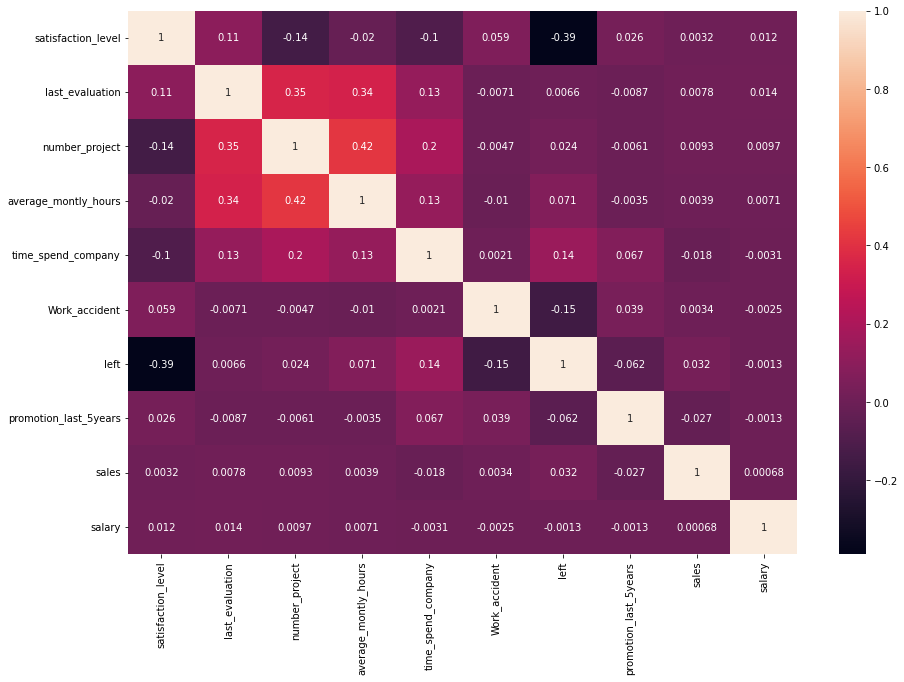

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [40]:
X = df.drop(columns=['left'])
X = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(X), columns=X.columns)
y = df['left']

In [42]:
X.info()
selected_satisfaction, selected_evaluation, selected_number_project_dropdown,  selected_time_dropdown, 
selected_accident, selected_promotion, selected_department, selected_salary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  float64
 6   promotion_last_5years  14999 non-null  float64
 7   sales                  14999 non-null  float64
 8   salary                 14999 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


In [43]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=666)

In [13]:
%%time
LIR = LinearRegression()
DTR = DecisionTreeRegressor()
RF = RandomForestRegressor(n_estimators = 100, random_state=555)
KNR = KNeighborsRegressor()
# XGB = XGBRegressor(n_estimators = 100, seed=666, eval_metric='logloss')
XGB = XGBRegressor()
reg_cv = GridSearchCV(XGB, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [100,500,1000]}, verbose=1)
reg_cv.fit(X_train,y_train)
XGB = XGBRegressor(**reg_cv.best_params_)
clfs = []
print('\nBest Parameter: ', reg_cv.best_params_)
print('\n5-fold cross validation:\n')
for clf, label in zip([LIR, DTR, RF, KNR, XGB],
                      ['Linear Regression',
                       'Decision Tree Regressor',
                       'Random Forest',
                       'KNeighbors',
                       'XGBoost'
                      ]):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="r2")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (clf.score(X_test, y_test)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.


Best Parameter:  {'colsample_bytree': 1.0, 'max_depth': 6, 'min_child_weight': 1.2, 'n_estimators': 500}

5-fold cross validation:

Train CV Accuracy: 0.192 (+/- 0.004) [Linear Regression]
Test Accuracy: 0.1967 
Train CV Accuracy: 0.873 (+/- 0.021) [Decision Tree Regressor]
Test Accuracy: 0.8823 
Train CV Accuracy: 0.933 (+/- 0.011) [Random Forest]
Test Accuracy: 0.9343 
Train CV Accuracy: 0.806 (+/- 0.022) [KNeighbors]
Test Accuracy: 0.8368 


/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

Train CV Accuracy: 0.930 (+/- 0.010) [XGBoost]


/Users/jyotibhandari/miniforge3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Test Accuracy: 0.9316 
CPU times: user 13min 9s, sys: 3min 11s, total: 16min 21s
Wall time: 2min 23s


In [20]:
clfs[2]

RandomForestRegressor(random_state=555)

In [21]:
pred = clfs[2].predict(X_test)
pred

array([0.  , 0.  , 0.03, ..., 0.  , 0.82, 0.  ])

In [22]:
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.109079


In [45]:
filename = 'Job_Satf.pkl'
outfile = open(filename,'wb')

In [46]:
pickle.dump(clfs[2],outfile)
outfile.close()

In [47]:
pickled_model = pickle.load(open('Job_Satf.pkl', 'rb'))
pickled_model.predict(X_test)

array([0.  , 0.  , 0.03, ..., 0.  , 0.82, 0.  ])